In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from math import sqrt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
#preprocessing
data_orig = pd.read_csv('OnlineNewsPopularity.csv', sep=', ')
data_orig = data_orig.dropna()

#remove awful outlier 31038
data_orig.drop(31038, axis=0, inplace=True)

columns = list(data_orig)
bestindex = [7, 18, 24, 26, 27, 28, 29, 30, 41, 42]
bestcol = [columns[i] for i in bestindex]

data = data_orig[bestcol].to_numpy()

samples = data
classes = data_orig["shares"].to_numpy()

samples = np.asarray(samples).astype(np.float32)
classes = np.asarray(classes).astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(samples, classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
#train
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
697/697 [==============================] - 1s 817us/step - loss: 120215992.0000 - val_loss: 257394736.0000
Epoch 2/50
697/697 [==============================] - 0s 616us/step - loss: 119703824.0000 - val_loss: 257238016.0000
Epoch 3/50
697/697 [==============================] - 0s 671us/step - loss: 119727000.0000 - val_loss: 257190832.0000
Epoch 4/50
697/697 [==============================] - 1s 751us/step - loss: 119796976.0000 - val_loss: 256763728.0000
Epoch 5/50
697/697 [==============================] - 0s 681us/step - loss: 119604976.0000 - val_loss: 257118256.0000
Epoch 6/50
697/697 [==============================] - 0s 619us/step - loss: 119647440.0000 - val_loss: 256737360.0000
Epoch 7/50
697/697 [==============================] - 0s 656us/step - loss: 119741888.0000 - val_loss: 257092256.0000
Epoch 8/50
697/697 [==============================] - 0s 616us/step - loss: 119732752.0000 - val_loss: 256774176.0000
Epoch 9/50
697/697 [==============================] - 0s

In [4]:
#validate
mse_test = model.evaluate(X_valid, y_valid)

233/233 [==============================] - 0s 570us/step - loss: 257374928.0000


In [5]:
#test
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.02567383949489377


In [33]:
best_six_indeces = [26, 27, 28, 30, 41, 42]
best_six_columns = [columns[i] for i in best_six_indeces]

data = data_orig[best_six_columns].to_numpy()
samples = data

samples = np.asarray(samples).astype(np.float32)
classes = np.asarray(classes).astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(samples, classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [34]:
#train
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
697/697 [==============================] - 1s 843us/step - loss: 191237424.0000 - val_loss: 54887620.0000
Epoch 2/50
697/697 [==============================] - 0s 608us/step - loss: 190854816.0000 - val_loss: 55377740.0000
Epoch 3/50
697/697 [==============================] - 0s 679us/step - loss: 190903328.0000 - val_loss: 54888660.0000
Epoch 4/50
697/697 [==============================] - 0s 664us/step - loss: 190851008.0000 - val_loss: 54925828.0000
Epoch 5/50
697/697 [==============================] - 0s 629us/step - loss: 190788832.0000 - val_loss: 54748696.0000
Epoch 6/50
697/697 [==============================] - 0s 641us/step - loss: 190541088.0000 - val_loss: 54693932.0000
Epoch 7/50
697/697 [==============================] - 0s 706us/step - loss: 190876976.0000 - val_loss: 54955112.0000
Epoch 8/50
697/697 [==============================] - 0s 621us/step - loss: 190902368.0000 - val_loss: 54865020.0000
Epoch 9/50
697/697 [==============================] - 0s 639us/s

In [35]:
#validate
mse_test = model.evaluate(X_valid, y_valid)

233/233 [==============================] - 0s 560us/step - loss: 55161188.0000


In [36]:
#test
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.021483077346698853


In [21]:
best_twenty_indeces = [7,9,10,11,18,20,21,24,25,26,27,28,29,30,41,42,44,53,56,59]
best_twenty_columns = [columns[i] for i in best_twenty_indeces]

data = data_orig[best_twenty_columns].to_numpy()
samples = data

samples = np.asarray(samples).astype(np.float32)
classes = np.asarray(classes).astype(np.float32)

X_train_full, X_test, y_train_full, y_test = train_test_split(samples, classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [22]:
#train
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
697/697 [==============================] - 1s 815us/step - loss: 169223088.0000 - val_loss: 121499440.0000
Epoch 2/50
697/697 [==============================] - 1s 744us/step - loss: 168792768.0000 - val_loss: 121764360.0000
Epoch 3/50
697/697 [==============================] - 0s 638us/step - loss: 168527376.0000 - val_loss: 121947840.0000
Epoch 4/50
697/697 [==============================] - 0s 631us/step - loss: 168553504.0000 - val_loss: 121819592.0000
Epoch 5/50
697/697 [==============================] - 0s 630us/step - loss: 168670656.0000 - val_loss: 122001288.0000
Epoch 6/50
697/697 [==============================] - 0s 675us/step - loss: 168610176.0000 - val_loss: 121733696.0000
Epoch 7/50
697/697 [==============================] - 0s 672us/step - loss: 168457920.0000 - val_loss: 121580744.0000
Epoch 8/50
697/697 [==============================] - 0s 638us/step - loss: 168492928.0000 - val_loss: 121591320.0000
Epoch 9/50
697/697 [==============================] - 0s

In [23]:
#validate
mse_test = model.evaluate(X_valid, y_valid)

233/233 [==============================] - 0s 414us/step - loss: 121311760.0000


In [24]:
#test
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.024490553983026464


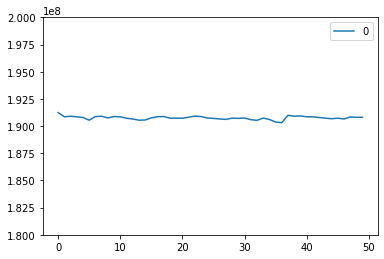

In [63]:
plt.ylim(1.8e8, 2e8)
sns.lineplot(data=pd.DataFrame(history.history['loss']))

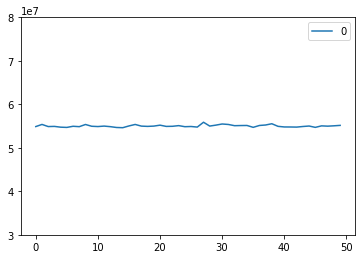

In [68]:
plt.ylim(0.3e8, 0.8e8)
sns.lineplot(data=pd.DataFrame(history.history['val_loss']))